In [1]:
%matplotlib inline
import numpy as np
from Settings import *
from Agent import *
from Obstacles import *
from Foods import *
from World import *  
import matplotlib.pyplot as plt
%matplotlib inline
Settings.SetBlockSize(100)

/home/aqeel/miniconda3/envs/PT/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


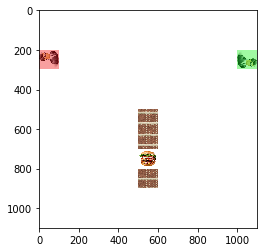

In [2]:
#Add Pictures
Settings.AddImage('Wall','Pics/wall.jpg')
Settings.AddImage('Food','Pics/food.jpg')

#Create Probabilities
obs = np.zeros(Settings.WorldSize)
agnts = np.zeros(Settings.WorldSize)
gagnt = np.zeros(Settings.WorldSize)
food = np.zeros(Settings.WorldSize)
obs[3:8,5] = 1
agnts[2,[0,10]] =1
food[:,4:7]=1

#Add Probabilities to Settings
Settings.AddProbabilityDistribution('Obs',obs)
Settings.AddProbabilityDistribution('agnts',agnts)
Settings.AddProbabilityDistribution('food',food)

#Create World Elements
obs = Obstacles('Wall',Shape=np.array([[1],[1],[1],[1]]),PdstName='Obs',See=False)
ragnt = Agent(Fname='Pics/ragent.jpg',PdstName='agnts')
gagnt = Agent(Fname='Pics/gagent.jpg',PdstName='agnts')
food = Foods('Food',PdstName='food')

game = World()
#Adding Agents in Order of Following the action
game.AddAgents([ragnt,gagnt])
game.AddObstacles([obs])
game.AddFoods([food])#,Foods('Food',PdstName='food')])

game.GenerateWorld()
game.Step()

plt.imshow(game.BuildImage())

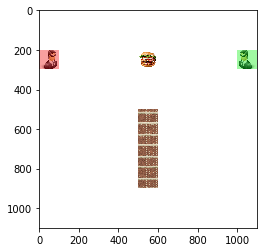

In [13]:
game.GenerateWorld()
game.Step()

plt.imshow(game.BuildImage())

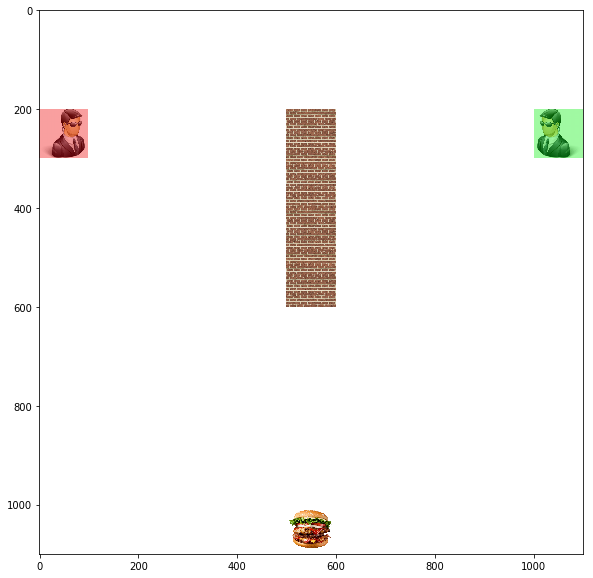

In [9]:
plt.figure(figsize=Settings.FigureSize)
plt.imshow(game.BuildImage())

In [ ]:
plt